# why not linear regression

suppose a binary classification problem, it's dataset is $\left \{ (x^{(1)},y^{(1)}),...,(x^{(n)},y^{(n)}) \right \} $, where $x^{(i)} \in \mathbb{R}^{d},\ y^{(i)} \in \left \{ 0, 1\right \}$.

can we use linear regression in this problem? i.e:

$$h_{\theta}(x^{(i)}) = \theta^{T}y^{(i)}$$

and

$$J(\theta) = \frac{1}{2}\sum_{i=1}^{n}(h_{\theta}(x^{(i)}) - y^{(i)})^2$$

for the purpose of classification, we may predict 1 whenever  $\theta^{T}x^{(i)} >= 0.5$, predict 0 otherwise, thus have the separating surface $\theta^{T}x^{(i)} = 0.5$. 

according to the loss function, we have the positive surface $\theta^{T}x^{(i)} = 1$, negative surface $\theta^{T}x^{(i)} = 0$. 

we want positive samples to be close to positive surface, negative samples to be close to negative surface. 

at this setting, for pairs $(h_{\theta}(x^{(i)}), y^{(i)})$

$(0, 1)$ is a positive sample lie in the negative surface, loss is $(0-1)^2$.

$(100, 1)$ is a positive sample with prediction very "positive", loss is $(100 - 1)^2$, way bigger than the first sample, this is absurd.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
x_pos = np.vstack((np.random.multivariate_normal([3, 0], [[1, 0], [0, 1]], 9), np.array([40, 0])))
x_neg = np.random.multivariate_normal([-3, 0], [[1, 0], [0, 1]], 10)
x = np.vstack((x_neg, x_pos))
y = np.concatenate((np.zeros(10), np.ones(10)))
model = LinearRegression()
model.fit(x, y)

LinearRegression()

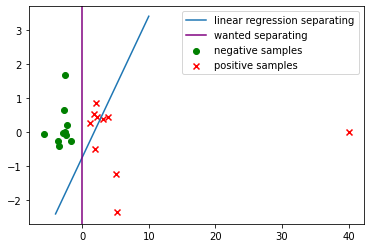

In [3]:
plt.scatter(x_neg[:, 0], x_neg[:, 1], c='green', marker='o', label='negative samples')
plt.scatter(x_pos[:, 0], x_pos[:, 1], c='red', marker='x', label='positive samples')
plt.plot(np.linspace(-4, 10, 100), 
         -(model.coef_[0] * np.linspace(-4, 10, 100) + model.intercept_ - 0.5) / model.coef_[1],
         label="linear regression separating")
plt.axvline(x=0, c="purple",label="wanted separating")
plt.legend()
plt.show()

# logistic regression model

some comments on why not linear regression unfit for binary classification problem:

1. $h_{\theta}(x) = \theta^{T}x \in \mathbb{R}$, while $y \in \left \{ 0, 1\right \}$
2. we want to find a monotony increase function $f$ that maps from $\mathbb{R}$ to $[0, 1]$, and the prediction change to $h_{\theta}(x) = f(\theta^{T}x)$
3. $h_{\theta}(x)$ can be seen as the probability of $y=1$

the sigmoid function is a nice one:

$$\sigma(x) = \frac{1}{1 + e^{-x}}$$

using sigmoid function, we derive the logistic regression model:

$$h_{\theta}(x) = \frac{1}{1 + e^{-\theta^{T}x}}$$

with probability interpretation:

$$p(y=1|x) = h_{\theta}(x)$$

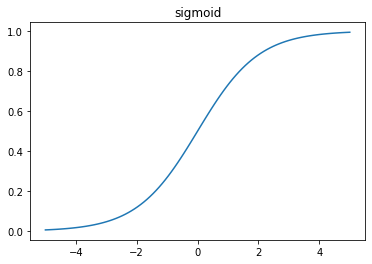

In [4]:
x = np.linspace(-5, 5, 100)
plt.plot(x, 1 / (1 + np.exp(-x)))
plt.title("sigmoid")
plt.show()

# cross entropy loss

as we suppose

$$p(y=1|x) = h_{\theta}(x)$$

and

$$p(y=0|x) = 1 - h_{\theta}(x)$$

combine these two:

$$p(y^{(i)}|x^{(i)}) = \left [ h_{\theta}(x^{(i)}) \right ]^{y^{(i)}}\left [ 1 - h_{\theta}(x^{(i)}) \right ]^{1 - y^{(i)}} $$

log likelikhood function:

$$
\begin{equation}
\begin{split}
L(\theta) &= log\prod_{i=1}^{n} \left [ h_{\theta}(x^{(i)}) \right ]^{y^{(i)}}\left [ 1 - h_{\theta}(x^{(i)}) \right ]^{1 - y^{(i)}} \\
&= \sum_{i=1}^{n}\left [y^{(i)}log\ h_{\theta}(x^{(i)}) + (1 - y^{(i)})log(1 - h_{\theta}(x^{(i)})) \right ]
\end{split}
\end{equation}
$$

using maximum likelihood, we derive the cross entropy loss:

$$J(\theta) = \sum_{i=1}^{n}-y^{(i)}log(h_{\theta}(x^{(i)})) - (1 - y^{(i)})log(1 - h_{\theta}(x^{(i)}))$$

write in matrix form:

$$J(\theta) = -y^{T}log(\sigma(\theta^{T}X)) - (1 - y)^{T}log(1 - \sigma(\theta^{T}X))$$

# update-rule

we have:

$$
\begin{equation}
\begin{split}
\frac{\partial }{\partial \theta_{j}}J(\theta ) &= \frac{\partial }{\partial \theta_{j}}\sum_{i=1}^{n}-log(\sigma(\theta^{T}x^{(i)}))y^{(i)} - log(1 - \sigma(\theta^{T}x^{(i)}))(1 - y^{(i)}) \\
&= \sum_{i=1}^{n} \left (-y^{(i)}\frac{1}{\sigma(\theta^{T}x^{(i)})} + (1 - y^{(i)})\frac{1}{1 - \sigma(\theta^{T}x^{(i)})} \right )\frac{\partial }{\partial \theta_{j}}\sigma(\theta^{T}x^{(i)})\\
&=\sum_{i=1}^{n} \left (-y^{(i)}\frac{1}{\sigma(\theta^{T}x^{(i)})} + (1 - y^{(i)})\frac{1}{1 - \sigma(\theta^{T}x^{(i)})} \right )\sigma(\theta^{T}x^{(i)})(1-\sigma(\theta^{T}x^{(i)}))\frac{\partial }{\partial \theta_{j}}\theta^{T}x^{(i)} \\
&=\sum_{i=1}^{n}(\sigma(\theta^{T}x^{(i)}) - y^{(i)})x_{j}^{(i)} \\
&=\sum_{i=1}^{n}(h_{\theta}(x^{(i)}) - y^{(i)})x_{j}^{(i)}
\end{split}
\end{equation}
$$

the same form with linear regression!

as linear regression, we have the update rule for logistic regression:

$$\theta_{j}: =\theta_{j} - \alpha\sum_{i=1}^{n} (h_{\theta }(x^{(i)}) - y^{(i)})x_{j}^{(i)} $$

combine all dimensions, we have:

$$\theta: =\theta - \alpha\sum_{i=1}^{n} (h_{\theta }(x^{(i)}) - y^{(i)})\cdot x^{(i)} $$

write in matrix form：
$$
\frac{\partial }{\partial \theta}J(\theta ) = X^{T}(\sigma(X\theta) -y)
$$
matrix form of update formula：
$$
\theta: =\theta - \alpha X^{T}(\sigma(X\theta)-\mathbf{y} )
$$

# regularization

like linear regression, we add penalty term on $J(\theta)$ for regularization

l2 penalty：
$$J(\theta) := J(\theta) + \lambda \left \| \theta \right \|_{2}^{2} $$

l1 penalty：
$$J(\theta) := J(\theta) + \lambda \left \| \theta \right \|_{1} $$

# softmax regression

while logistic regression can deal with binary classification, but how to solve the multi-class classification problem?

suppose a k-class classification problem, it's dataset is $\left \{ (x^{(1)},y^{(1)}),...,(x^{(n)},y^{(n)}) \right \} $, where $x^{(i)} \in \mathbb{R}^{d},\ y^{(i)} \in \left \{ 1, 2, ..., k\right \}$

models that output only one number is not sufficient, instead we want to output a probability distribution $(p_{1}(x), p_{2}(x), ..., p_{k}(x))$, where $p_{j}(x)$ can be interpreted as the probability of $y=j$, i.e

$$p(y=j|x;\theta) = p_{j}(x)$$

to output a probability distribution with k values, we first need to simply output k values

using linear model in each class: $s_{j}(x) = \theta_{j}^{T}x$, we denote $\theta = (\theta_{1},...,\theta_{k})$ is a $d \times k$ matrix, $\theta_{j}$ is it's j's column.

after derive k values $s_{j}(x)$,we can use exp to tranform it into probability distribution:

$$p_{j}(x) = \frac{e^{s_{j}(x)}}{e^{s_{1}(x)} + e^{s_{2}(x)} + ... + e^{s_{k}(x)}} = \frac{e^{\theta_{j}^{T}x}}{e^{\theta_{1}^{T}x} + ... + e^{\theta_{k}^{T}x}}$$

what is the loss function?

when $y^{(i)} = j$, we only care about the size of $p_{j}(x^{(i)})$, i.e the predicted probability of the j-th class, this remind us of the cross-entropy loss:

$$l(x^{(i)}, y^{(i)}) = -log\ p_{y^{(i)}}\ (x^{(i)})$$

this is softmax regression